In [ ]:
!nvidia-smi

Tue Oct 17 08:41:38 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   66C    P0    32W /  70W |    485MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.inception_v3 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob

In [ ]:
# resize all the images to this
IMAGE_SIZE = [224,224]

train_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train'
test_path = '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid'

In [ ]:
# Import the InceptionV3 library and preprocessing layer to the front of InceptionV3
# Here we will be using imagenet weights
inception = InceptionV3(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

87910968/87910968 [==============================] - 0s 0us/step


In [ ]:
# Don't train exisiting weights
for layer in inception.layers:
    layer.trainable = False

In [ ]:
folders = glob('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy']

In [ ]:
len(folders)

10

In [ ]:
# our layers - you can add more if you want
x = Flatten()(inception.output)

In [ ]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=inception.input, outputs=prediction)

In [ ]:
# view the structure of the model
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 conv2d (Conv2D)             (None, 111, 111, 32)         864       ['input_1[0][0]']             
                                                                                                  
 batch_normalization (Batch  (None, 111, 111, 32)         96        ['conv2d[0][0]']              
 Normalization)                                                                                   
                                                                                                  
 activation (Activation)     (None, 111, 111, 32)         0         ['batch_normalization[0][0

In [ ]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [ ]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure we provide the same target size as initialized for the image size
training_set = train_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                target_size = (224,224),
                                                batch_size = 16,
                                                class_mode = 'categorical')

Found 18345 images belonging to 10 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid',
                                                target_size = (224,224),
                                                batch_size = 16,
                                                class_mode = 'categorical')

Found 4585 images belonging to 10 classes.


In [ ]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
training_set,
validation_data=test_set,
epochs=10,
steps_per_epoch=len(training_set),
validation_steps=len(test_set))

<ipython-input-19-4ddbb528a734>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(


Epoch 1/10
1147/1147 [==============================] - 6224s 5s/step - loss: 4.3301 - accuracy: 0.6820 - val_loss: 3.4207 - val_accuracy: 0.7684
Epoch 2/10
1147/1147 [==============================] - 300s 261ms/step - loss: 3.4216 - accuracy: 0.7876 - val_loss: 2.8893 - val_accuracy: 0.8190
Epoch 3/10
1147/1147 [==============================] - 298s 260ms/step - loss: 3.1314 - accuracy: 0.8237 - val_loss: 2.6820 - val_accuracy: 0.8417
Epoch 4/10
1147/1147 [==============================] - 292s 254ms/step - loss: 3.0833 - accuracy: 0.8439 - val_loss: 3.7382 - val_accuracy: 0.8316
Epoch 5/10
1147/1147 [==============================] - 297s 259ms/step - loss: 3.1977 - accuracy: 0.8516 - val_loss: 5.0539 - val_accuracy: 0.7786
Epoch 6/10
1147/1147 [==============================] - 305s 266ms/step - loss: 3.0205 - accuracy: 0.8595 - val_loss: 3.4672 - val_accuracy: 0.8532
Epoch 7/10
1147/1147 [==============================] - 298s 260ms/step - loss: 2.7687 - accuracy: 0.8741 - val_lo

In [ ]:
from tensorflow.keras.models import load_model
model = load_model("/content/drive/MyDrive/model/model.h5")


In [ ]:
import matplotlib.pyplot as plt


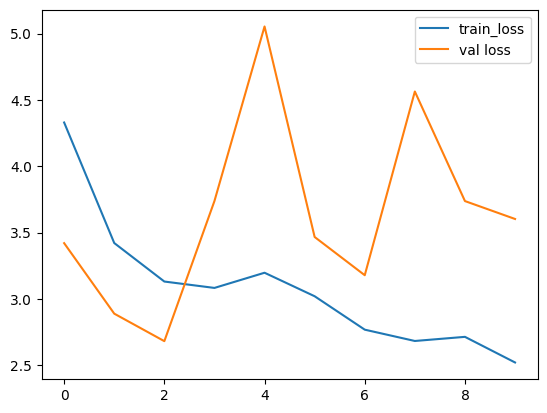

In [ ]:
#Plotting the loss
plt.plot(r.history['loss'], label='train_loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()

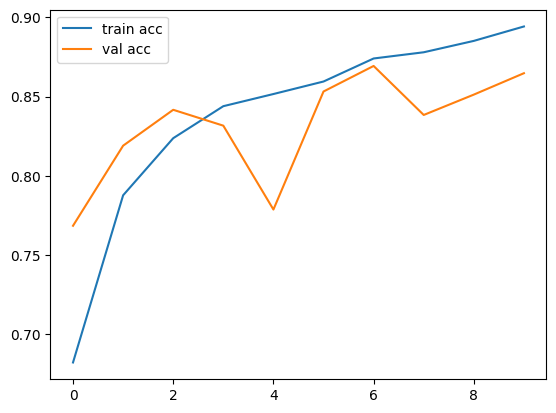

In [ ]:
# Plotting the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()

In [ ]:
model.save("/content/drive/MyDrive/model/model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
